In [4]:
import pandas as pd 
import numpy as np 

import seaborn as sn 
from seaborn import distplot
from seaborn import heatmap

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
 
# Scikit-Learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
# from sklearn.metrics import plot_confusion_matrix, confusion_matrix


In [4]:
df.shape

(42372, 1036)

In [5]:
df = pd.read_csv('data.csv')

In [5]:
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [6]:
df.isna().sum()

CONS_NO          0
FLAG             0
2014/1/1     16502
2014/1/10    16460
2014/1/11    16461
             ...  
2016/9/5       499
2016/9/6       522
2016/9/7       405
2016/9/8       328
2016/9/9       345
Length: 1036, dtype: int64

In [7]:
values = df.iloc[0][2:]

In [8]:
df_nn = df.drop('FLAG',axis =1)
df_nn = df_nn.drop('CONS_NO',axis=1)

In [9]:
df_nn.head()

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [10]:
df_T = df_nn.T

In [11]:
df_T

,0,1,2,3,4,5,6,7,8,9,...,42362,42363,42364,42365,42366,42367,42368,42369,42370,42371
2014/1/1,NaN,NaN,NaN,NaN,2.90,NaN,0.11,0.91,NaN,11.02,...,NaN,148.40,0.00,5.22,NaN,NaN,2.70,0.58,16.89,NaN
2014/1/10,NaN,NaN,NaN,NaN,3.42,NaN,0.53,0.86,NaN,8.24,...,NaN,174.02,0.00,0.00,NaN,NaN,4.39,0.84,13.84,NaN
2014/1/11,NaN,NaN,NaN,NaN,3.81,NaN,0.45,1.10,NaN,7.94,...,NaN,122.26,0.00,15.96,NaN,NaN,3.95,1.61,13.50,NaN
2014/1/12,NaN,NaN,NaN,NaN,4.58,NaN,0.51,0.66,NaN,7.92,...,NaN,133.16,0.00,14.53,NaN,NaN,0.00,0.90,14.60,NaN
2014/1/13,NaN,NaN,NaN,NaN,3.56,NaN,1.32,5.82,NaN,8.31,...,NaN,173.65,0.00,15.43,NaN,NaN,0.00,0.60,14.46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016/9/5,18.05,0.0,NaN,18.57,14.68,3.23,1.36,4.61,2.77,108.69,...,13.08,283.51,1.83,4.75,1.29,3.77,4.58,4.28,18.11,12.04
2016/9/6,26.47,0.0,NaN,14.59,16.35,3.85,0.56,3.13,3.02,87.88,...,10.90,303.76,1.39,6.94,0.67,3.96,3.33,3.37,19.31,9.90
2016/9/7,18.75,0.0,NaN,12.82,18.14,2.78,1.02,3.10,4.06,86.36,...,11.57,285.34,7.50,4.55,0.76,3.64,3.19,6.67,17.48,8.23
2016/9/8,17.84,0.0,NaN,19.37,18.41,3.55,1.96,3.74,4.75,81.51,...,10.90,282.57,4.40,6.12,1.16,3.40,4.57,2.44,17.20,8.56


In [12]:
ids = []
# ids.append('Date')

In [147]:
for i in range(1,42373):
    ids.append(i)

In [148]:
ids[-1]

42372

In [149]:
ind = df_T.index

In [150]:
df_T.columns = ids

In [151]:
df_T.reset_index(drop = True)

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,NaN,NaN,NaN,NaN,2.90,NaN,0.11,0.91,NaN,11.02,...,NaN,148.40,0.00,5.22,NaN,NaN,2.70,0.58,16.89,NaN
1,NaN,NaN,NaN,NaN,3.42,NaN,0.53,0.86,NaN,8.24,...,NaN,174.02,0.00,0.00,NaN,NaN,4.39,0.84,13.84,NaN
2,NaN,NaN,NaN,NaN,3.81,NaN,0.45,1.10,NaN,7.94,...,NaN,122.26,0.00,15.96,NaN,NaN,3.95,1.61,13.50,NaN
3,NaN,NaN,NaN,NaN,4.58,NaN,0.51,0.66,NaN,7.92,...,NaN,133.16,0.00,14.53,NaN,NaN,0.00,0.90,14.60,NaN
4,NaN,NaN,NaN,NaN,3.56,NaN,1.32,5.82,NaN,8.31,...,NaN,173.65,0.00,15.43,NaN,NaN,0.00,0.60,14.46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,18.05,0.0,NaN,18.57,14.68,3.23,1.36,4.61,2.77,108.69,...,13.08,283.51,1.83,4.75,1.29,3.77,4.58,4.28,18.11,12.04
1030,26.47,0.0,NaN,14.59,16.35,3.85,0.56,3.13,3.02,87.88,...,10.90,303.76,1.39,6.94,0.67,3.96,3.33,3.37,19.31,9.90
1031,18.75,0.0,NaN,12.82,18.14,2.78,1.02,3.10,4.06,86.36,...,11.57,285.34,7.50,4.55,0.76,3.64,3.19,6.67,17.48,8.23
1032,17.84,0.0,NaN,19.37,18.41,3.55,1.96,3.74,4.75,81.51,...,10.90,282.57,4.40,6.12,1.16,3.40,4.57,2.44,17.20,8.56


In [153]:
Dates = []
for i in range(1034):
    Dates.append(ind[i])
df_T.insert(loc = 0, column = 'Date', value = Dates)

In [154]:
df_T.reset_index(drop=True)

,Date,1,2,3,4,5,6,7,8,9,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,2014/1/1,NaN,NaN,NaN,NaN,2.90,NaN,0.11,0.91,NaN,...,NaN,148.40,0.00,5.22,NaN,NaN,2.70,0.58,16.89,NaN
1,2014/1/10,NaN,NaN,NaN,NaN,3.42,NaN,0.53,0.86,NaN,...,NaN,174.02,0.00,0.00,NaN,NaN,4.39,0.84,13.84,NaN
2,2014/1/11,NaN,NaN,NaN,NaN,3.81,NaN,0.45,1.10,NaN,...,NaN,122.26,0.00,15.96,NaN,NaN,3.95,1.61,13.50,NaN
3,2014/1/12,NaN,NaN,NaN,NaN,4.58,NaN,0.51,0.66,NaN,...,NaN,133.16,0.00,14.53,NaN,NaN,0.00,0.90,14.60,NaN
4,2014/1/13,NaN,NaN,NaN,NaN,3.56,NaN,1.32,5.82,NaN,...,NaN,173.65,0.00,15.43,NaN,NaN,0.00,0.60,14.46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2016/9/5,18.05,0.0,NaN,18.57,14.68,3.23,1.36,4.61,2.77,...,13.08,283.51,1.83,4.75,1.29,3.77,4.58,4.28,18.11,12.04
1030,2016/9/6,26.47,0.0,NaN,14.59,16.35,3.85,0.56,3.13,3.02,...,10.90,303.76,1.39,6.94,0.67,3.96,3.33,3.37,19.31,9.90
1031,2016/9/7,18.75,0.0,NaN,12.82,18.14,2.78,1.02,3.10,4.06,...,11.57,285.34,7.50,4.55,0.76,3.64,3.19,6.67,17.48,8.23
1032,2016/9/8,17.84,0.0,NaN,19.37,18.41,3.55,1.96,3.74,4.75,...,10.90,282.57,4.40,6.12,1.16,3.40,4.57,2.44,17.20,8.56


In [155]:
df_f = df_T.reset_index(drop=True)

In [156]:
df_f['Date'] = pd.to_datetime(df_f.Date)

In [157]:
df_f = df_f.sort_values(by ='Date')

In [163]:
df_f.shape

(1034, 42373)

In [5]:
df_f.to_csv('SortedDataFrame.csv')

NameError: name 'df_f' is not defined

In [6]:
df_new = pd.read_csv('CleanDataFrame.csv')

Preprocessing the data to handle missing values : 

In [7]:
df_new.isna().sum()

Unnamed: 0    0
CONS_NO       0
2014/1/1      0
2014/1/10     0
2014/1/11     0
             ..
2016/9/5      0
2016/9/6      0
2016/9/7      0
2016/9/8      0
2016/9/9      0
Length: 1036, dtype: int64

In [9]:
df_new.head()

,Unnamed: 0,CONS_NO,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0,0387DD8A07E07FDA6271170F86AD9151,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,...,10.12,9.960,16.92,7.600,27.22,18.050,26.470,18.75,17.840,14.92
1,1,01D6177B5D4FFE0CABA9EF17DAFC2B84,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,...,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00
2,2,4B75AC4F2D8434CFF62DB64D0BB43103,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,...,3.25,4.995,5.89,9.295,13.40,9.285,7.295,6.41,9.685,7.96
3,3,B32AC8CC6D5D805AC053557AB05F5343,1.45,1.71,1.905,2.29,1.78,2.125,1.93,1.765,...,6.50,9.990,11.78,18.590,26.80,18.570,14.590,12.82,19.370,15.92
4,4,EDFC78B07BA2908B3395C4EB2304665E,2.90,3.42,3.810,4.58,3.56,4.250,3.86,3.530,...,17.77,10.370,15.32,13.510,12.23,14.680,16.350,18.14,18.410,17.31


In [10]:
columns = df_new.columns

In [79]:
for i , x in enumerate(df_new['2014/1/1']):
    if(i == 0 and np.isnan(x)):
        df_new['2014/1/1'][i] = 0
    if(i == 42371 ):
        df_new['2014/1/1'][i] = df_new['2014/1/1'][42370]/2
        break
    elif(np.isnan(x) and (not(np.isnan(df_new['2014/1/1'][i-1])) and not(np.isnan(df_new['2014/1/1'][i+1])))):
        df_new['2014/1/1'][i] = (df_new['2014/1/1'][i-1]+df_new['2014/1/1'][i+1])/2
    elif(np.isnan(x) and (np.isnan(df_new['2014/1/1'][i-1]) or np.isnan(df_new['2014/1/1'][i+1]))):
        df_new['2014/1/1'][i] = 0
    elif(not(np.isnan(x))):
        df_new['2014/1/1'][i]=x
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
df_new.isna().sum()

Unnamed: 0    0
CONS_NO       0
2014/1/1      0
2014/1/10     0
2014/1/11     0
             ..
2016/9/5      0
2016/9/6      0
2016/9/7      0
2016/9/8      0
2016/9/9      0
Length: 1036, dtype: int64

In [98]:
for column in columns[2:]:
    for i , x in enumerate(df_new[column]):
        if(i == 0 and np.isnan(x)):
            df_new[column][i] = 0
        elif(i == 0 and not(np.isnan(x))):
            df_new[column][i] = x
        elif(i == 42371 and np.isnan(x)):
            df_new[column][i] = df_new[column][42370]/2
            break
        elif(np.isnan(x) and (not(np.isnan(df_new[column][i-1])) and not(np.isnan(df_new[column][i+1])))):
            df_new[column][i] = (df_new[column][i-1]+df_new[column][i+1])/2
        elif(np.isnan(x) and (np.isnan(df_new[column][i-1]) or np.isnan(df_new[column][i+1]))):
            df_new[column][i] = 0
        elif(not(np.isnan(x))):
            df_new[column][i]=x
    
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages

In [13]:
df_new.isna().sum()

Unnamed: 0    0
CONS_NO       0
2014/1/1      0
2014/1/10     0
2014/1/11     0
             ..
2016/9/5      0
2016/9/6      0
2016/9/7      0
2016/9/8      0
2016/9/9      0
Length: 1036, dtype: int64

In [12]:
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [22]:
df_new.to_csv('CleanDataFrame.csv')

In [23]:
df_new.columns

Index(['Unnamed: 0', 'CONS_NO', '2014/1/1', '2014/1/10', '2014/1/11',
       '2014/1/12', '2014/1/13', '2014/1/14', '2014/1/15', '2014/1/16',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1036)

In [28]:
df_new.drop('Unnamed: 0',axis=1)

,CONS_NO,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,...,10.12,9.960,16.92,7.600,27.22,18.050,26.470,18.75,17.840,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,...,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,...,3.25,4.995,5.89,9.295,13.40,9.285,7.295,6.41,9.685,7.96
3,B32AC8CC6D5D805AC053557AB05F5343,1.450,1.710,1.905,2.29,1.78,2.125,1.930,1.765,1.705,...,6.50,9.990,11.78,18.590,26.80,18.570,14.590,12.82,19.370,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,2.900,3.420,3.810,4.58,3.56,4.250,3.860,3.530,3.410,...,17.77,10.370,15.32,13.510,12.23,14.680,16.350,18.14,18.410,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,1.350,2.195,1.975,0.00,0.00,0.000,0.000,0.000,0.000,...,4.25,3.560,3.38,4.390,3.72,3.770,3.960,3.64,3.400,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,2.700,4.390,3.950,0.00,0.00,0.000,0.000,0.000,0.000,...,4.81,4.870,4.48,3.670,3.31,4.580,3.330,3.19,4.570,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0.580,0.840,1.610,0.90,0.60,0.820,0.890,0.030,0.730,...,12.97,0.660,2.92,2.360,3.86,4.280,3.370,6.67,2.440,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,16.890,13.840,13.500,14.60,14.46,12.340,15.370,17.010,13.460,...,21.13,13.750,22.61,18.830,25.52,18.110,19.310,17.48,17.200,15.28


In [34]:
df_new.columns

Index(['CONS_NO', '2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12',
       '2014/1/13', '2014/1/14', '2014/1/15', '2014/1/16', '2014/1/17',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1035)

In [238]:
df_new.iloc[3615]

CONS_NO      1ECF28CAF36C19132B0673378B2B8AA3
2014/1/1                                 6.22
2014/1/10                                 7.2
2014/1/11                                9.24
2014/1/12                                8.58
                           ...               
2016/9/5                                42.54
2016/9/6                                39.52
2016/9/7                                31.19
2016/9/8                                22.41
2016/9/9                                 4.45
Name: 3615, Length: 1035, dtype: object

In [44]:
df_new['2014/1/1']

dtype('float64')

In [14]:
electricity_consumption = []
days = []

In [15]:
for i in range(1,7):
    electricity_consumption.append(df_new.iloc[3][1:8][i])

In [16]:
electricity_consumption

[1.45, 1.71, 1.905, 2.29, 1.78, 2.125]

In [17]:
for i in range(2,8):
    days.append(df_new.columns[i])

In [18]:
days

['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13', '2014/1/14']

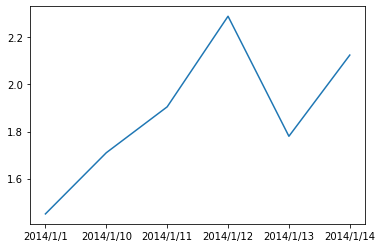

In [19]:
plt.plot(days,electricity_consumption);

In [52]:
def get_dataset(filepath):
    """## Saving "flags" """

    df_raw = pd.read_csv(filepath,index_col=0)
    flags = df_raw.FLAG.copy()
 
    df_raw.drop(['FLAG'], axis=1, inplace=True)

    """## Sorting"""


    df_raw = df_raw.T.copy()
    df_raw.index = pd.to_datetime(df_raw.index)
    df_raw.sort_index(inplace=True, axis=0)
    df_raw = df_raw.T.copy()
    df_raw['FLAG'] = flags
    return df_raw
df_raw = get_dataset('data.csv')

In [53]:
# df_raw = get_dataset(filepath)
flags = df_raw['FLAG']
df_raw.drop(['FLAG'], axis=1, inplace=True)
quantile = quantile_transform(df_raw.values, n_quantiles=20, random_state=0, copy=True, output_distribution='uniform')
df_final = pd.DataFrame(data=quantile, columns=df_raw.columns, index=df_raw.index)
df_final['flags'] = flags

In [54]:
df_final.head()

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00,flags
CONS_NO,,,,,,,,,,,,,,,,,,,,,
0387DD8A07E07FDA6271170F86AD9151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.685046,0.735279,0.783094,0.563910,0.726620,0.741228,0.691658,0.778803,0.675333,1
01D6177B5D4FFE0CABA9EF17DAFC2B84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4B75AC4F2D8434CFF62DB64D0BB43103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.904597,0.930766,0.918363,0.937540,0.913496,0.907446,0.910894,0.903269,0.902033,1
B32AC8CC6D5D805AC053557AB05F5343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.874281,0.925888,0.899142,0.924768,0.924234,0.903645,0.935455,0.905762,0.868351,1
EDFC78B07BA2908B3395C4EB2304665E,0.476397,0.620964,0.703624,0.497976,0.503359,0.611708,0.590146,0.527978,0.522396,0.530564,...,0.767155,0.751819,0.612323,0.603427,0.628157,0.664350,0.822464,0.804857,0.776648,1


In [62]:
df_new.describe()

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,...,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000
mean,5.812261,5.667326,5.549976,5.771644,7.789505,5.868119,5.988065,5.820755,5.562139,5.748522,...,8.766755,9.290251,10.991211,9.957543,11.230823,11.738173,11.947154,11.590937,11.253047,10.956169
std,30.337808,35.704001,34.997322,28.951846,450.816091,30.786096,33.120928,32.949274,27.211143,30.336974,...,51.300850,56.506302,94.914451,61.831253,94.136997,108.976548,128.704802,112.533824,108.423597,116.224169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.710000,0.860000,0.903750,0.950000,0.920000,0.950000,0.970000,0.930000,0.930000,0.920000
50%,2.010000,1.665000,1.710000,2.065000,2.180000,2.015000,2.160000,1.865000,1.990000,2.020000,...,4.400000,4.690000,5.020000,4.860000,5.180000,5.130000,5.210000,5.140000,5.040000,4.950000
75%,7.160000,6.540000,6.590000,7.076250,6.980000,7.075000,7.220000,7.070000,6.885000,7.110000,...,9.250000,9.380000,10.750000,9.700000,11.400000,11.440000,11.610000,11.320000,10.740000,10.290000
max,3318.000000,3966.000000,4392.000000,3414.000000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,3258.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.000000


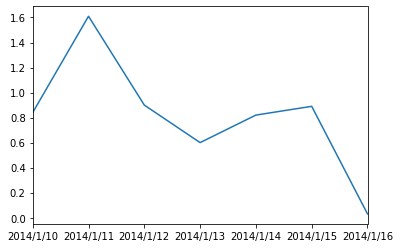

In [60]:
df_new.iloc[42369][2:9].plot()

In [66]:
df_new['2014/1/1'].mean()

5.812261163032212

Removing Outliers :
Using Three-Sigma rule of thumb

In [65]:
cols = df_new.columns[1:]

In [70]:
df_new.describe()

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,...,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000
mean,5.812261,4.473458,4.463311,4.713135,5.237853,4.769672,4.874205,4.716654,4.574192,4.719500,...,8.766755,9.290251,10.991211,9.957543,11.230823,11.738173,11.947154,11.590937,11.253047,10.956169
std,30.337808,6.992843,6.894018,6.819963,15.986701,7.062407,7.142072,7.013641,6.586877,6.844865,...,51.300850,56.506302,94.914451,61.831253,94.136997,108.976548,128.704802,112.533824,108.423597,116.224169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.710000,0.860000,0.903750,0.950000,0.920000,0.950000,0.970000,0.930000,0.930000,0.920000
50%,2.010000,1.665000,1.710000,2.065000,2.180000,2.015000,2.160000,1.865000,1.990000,2.020000,...,4.400000,4.690000,5.020000,4.860000,5.180000,5.130000,5.210000,5.140000,5.040000,4.950000
75%,7.160000,6.540000,6.590000,7.076250,6.980000,7.075000,7.220000,7.070000,6.885000,7.110000,...,9.250000,9.380000,10.750000,9.700000,11.400000,11.440000,11.610000,11.320000,10.740000,10.290000
max,3318.000000,77.075328,75.544620,63.675337,909.421688,67.440312,72.229920,71.719303,59.984425,66.422471,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.000000


In [136]:
Jan = df_new.iloc[4][1:32]

In [241]:
Jan2 = df_new.iloc[3615][1:32]

In [152]:
Jan[12]

3.81

In [123]:
week1 = [df_new.iloc[4][1],df_new.iloc[4][12],df_new.iloc[4][23],df_new.iloc[4][1:30][-4],
        df_new.iloc[4][1:30][-3],df_new.iloc[4][1:30][-2],df_new.iloc[4][1:30][-1]]

In [160]:
week2 = [Jan[29],Jan[30],Jan[1],Jan[2],Jan[3],Jan[4],Jan[5]]

In [159]:
week3 = [Jan[6],Jan[7],Jan[8],Jan[9],Jan[10],Jan[12],Jan[13]]

In [221]:
week4 = [Jan[14],Jan[15],Jan[16],Jan[17],Jan[18],Jan[19],Jan[20]]

In [163]:
df_try = {'Week1':week1,'Week2':week2,'Week3':week3,'Week4':week4}

In [164]:
df_try

{'Week1': [2.9, 5.64, 6.99, 3.32, 3.61, 5.35, 4.73],
 'Week2': [3.68, 3.53, 3.42, 3.81, 4.58, 3.56, 4.25],
 'Week3': [3.86, 3.53, 3.41, 0.85, 0.88, 3.81, 6.51],
 'Week4': [9.19, 7.79, 7.02, 7.25, 6.37, 6.43, 7.89]}

In [165]:
df_try_f = pd.DataFrame(df_try,
columns=['Week1', 'Week2', 'Week3','Week4'])

In [185]:
df_try_f.corr(method='pearson')

,Week1,Week2,Week3,Week4
Week1,1.000000,-0.507456,0.344186,-0.348957
Week2,-0.507456,1.000000,-0.150859,-0.211971
Week3,0.344186,-0.150859,1.000000,0.435734
Week4,-0.348957,-0.211971,0.435734,1.000000


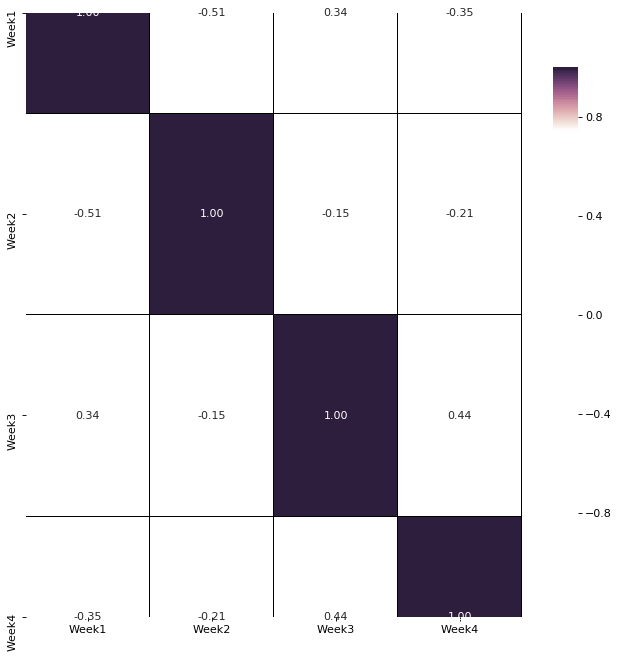

In [210]:

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f.corr(method='pearson'), annot=True, vmin=-1, vmax=1, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='black')
plt.show()

In [215]:
df_new.iloc[3615][1:32]

2014/1/1      1.35
2014/1/10    2.195
2014/1/11    1.975
2014/1/12        0
2014/1/13        0
2014/1/14        0
2014/1/15        0
2014/1/16        0
2014/1/17        0
2014/1/18        0
2014/1/19        0
2014/1/2         0
2014/1/20        0
2014/1/21     3.91
2014/1/22    4.435
2014/1/23     2.12
2014/1/24     2.12
2014/1/25     1.64
2014/1/26     2.38
2014/1/27     2.78
2014/1/28        0
2014/1/29        0
2014/1/3         0
2014/1/30        0
2014/1/31        0
2014/1/4      2.86
2014/1/5     3.025
2014/1/6     2.905
2014/1/7     1.535
2014/1/8      2.02
2014/1/9      2.84
Name: 42367, dtype: object

In [242]:
week1_n = [df_new.iloc[3615][1],df_new.iloc[3615][12],df_new.iloc[3615][23],df_new.iloc[3615][1:30][-4],
        df_new.iloc[3615][1:30][-3],df_new.iloc[3615][1:30][-2],df_new.iloc[3615][1:30][-1]]

In [243]:
week2_n = [Jan2[29],Jan2[30],Jan2[1],Jan2[2],Jan2[3],Jan2[4],Jan2[5]]

In [244]:
week3_n = [Jan2[6],Jan2[7],Jan2[8],Jan2[9],Jan2[10],Jan2[12],Jan2[13]]

In [245]:
week4_n = [Jan2[14],Jan2[15],Jan2[16],Jan2[17],Jan2[18],Jan2[19],Jan2[20]]

In [246]:
df_try_n = {'Week1':week1_n,'Week2':week2_n,'Week3':week3_n,'Week4':week4_n}

In [247]:
df_try_f2 = pd.DataFrame(df_try_n,
columns=['Week1', 'Week2', 'Week3','Week4'])

In [248]:
df_try_f2.corr()

,Week1,Week2,Week3,Week4
Week1,1.000000,0.627230,0.283248,0.222363
Week2,0.627230,1.000000,-0.156408,0.318293
Week3,0.283248,-0.156408,1.000000,-0.365211
Week4,0.222363,0.318293,-0.365211,1.000000


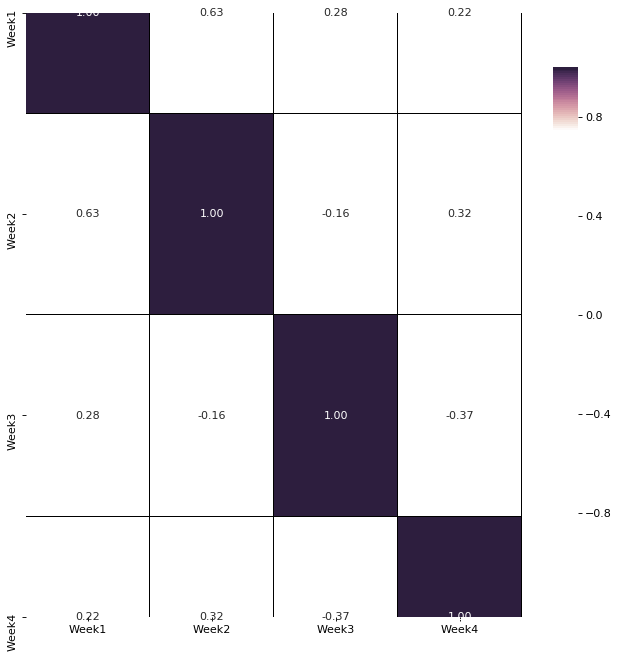

In [249]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f2.corr(method='pearson'), annot=True, vmin=-1, vmax=1, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='black')
plt.show()

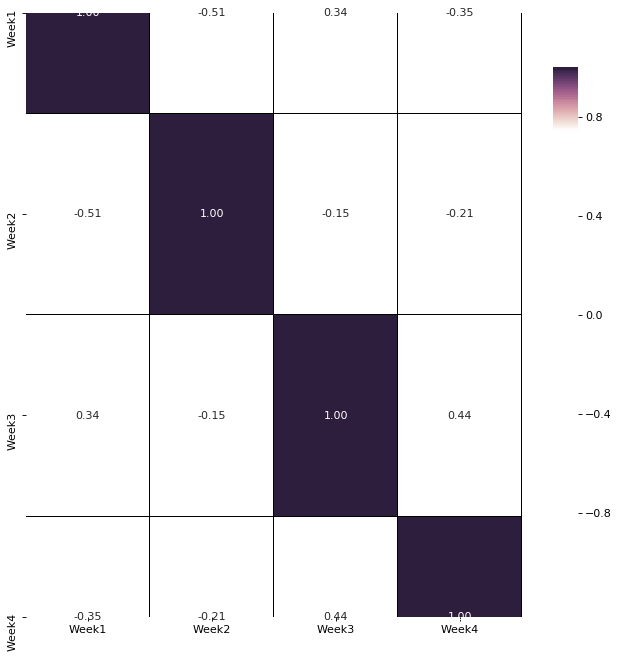

In [250]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f.corr(method='pearson'), annot=True, vmin=-1, vmax=1, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='black')
plt.show()

In [275]:
cons = []

In [276]:
Janb=df_new.iloc[42367][1:]

In [277]:
Janb[0]

1.35

In [278]:
for i , x in enumerate(Janb):
    cons.append(Janb[i])

In [279]:
len(cons)

1034

In [280]:
cons = np.array(cons)

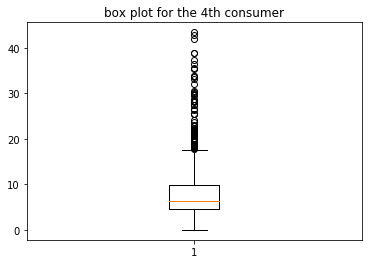

In [270]:
plt.boxplot(cons);
plt.title('box plot for the 4th consumer');

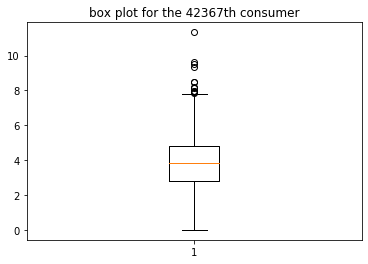

In [281]:
plt.boxplot(cons);
plt.title('box plot for the 42367th consumer');

In [170]:
df_final = pd.read_csv('CleanSortedDataFrame.csv')

In [171]:
df_final.head()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0


In [172]:
df_final = df_final.drop('Unnamed: 0',axis = 1)


In [173]:
df_final.head()

,Date,1,2,3,4,5,6,7,8,9,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,0.0,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,0.0,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,0.0,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,0.0,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,0.0,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0


In [189]:
d1 = []

In [190]:
for i , x in enumerate(df_final['1']):
    d1.append(df_final['1'][i])


In [194]:
df_final.describe()

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
count,1034.000000,1034.0,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,...,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,7.988158,0.0,2.501688,6.701586,8.229603,1.229874,1.522340,2.721132,1.980604,37.214647,...,8.806944,167.009255,2.975619,6.577012,1.067490,3.227220,4.607118,1.333032,15.126170,2.674942
std,9.591200,0.0,5.490719,10.603029,5.942862,2.565204,1.874682,2.810982,3.638884,36.462349,...,4.767055,71.212421,2.517850,3.516869,1.057729,2.214186,1.898838,1.876921,8.563308,4.745446
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,4.650000,0.000000,0.000000,0.850000,0.000000,0.000000,...,6.090000,130.252500,0.000000,4.312500,0.000000,0.960000,3.852500,0.430000,11.550000,0.000000
50%,6.270000,0.0,0.000000,0.000000,6.255000,0.000000,0.900000,2.115000,0.000000,35.790000,...,8.665000,156.005000,2.920000,5.425000,0.840000,3.750000,4.710000,0.740000,14.850000,0.000000
75%,11.642500,0.0,0.000000,11.940000,9.860000,2.202500,2.405000,3.930000,3.527500,63.790000,...,12.117500,197.342500,4.567500,7.610000,1.750000,4.837500,5.740000,1.257500,19.225000,4.777500
max,46.490000,0.0,32.810000,52.760000,43.430000,16.990000,13.210000,33.690000,31.080000,168.410000,...,19.690000,422.550000,13.430000,19.890000,4.810000,11.340000,16.430000,12.080000,48.330000,27.420000


In [10]:
df_final_2 = pd.read_csv('CleanSortedOutDataFrame.csv')

In [11]:
df_final_2 = df_final_2.drop('Unnamed: 0',axis = 1)

In [130]:
df_final_2.describe()

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
count,1034.000000,1034.0,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,...,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,7.650229,0.0,2.159104,6.288852,7.825693,1.038328,1.442297,2.562209,1.831727,36.481197,...,8.794819,164.899810,2.929674,6.425892,1.042172,3.214544,4.588565,1.170392,14.904013,2.452050
std,8.700374,0.0,4.292646,9.457396,4.499828,1.799215,1.606192,1.921941,3.185618,34.633564,...,4.741598,65.874820,2.398947,3.119834,0.995888,2.182827,1.839224,1.300801,7.992073,4.126482
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,4.650000,0.000000,0.000000,0.850000,0.000000,0.000000,...,6.090000,130.252500,0.000000,4.312500,0.000000,0.960000,3.852500,0.430000,11.550000,0.000000
50%,6.270000,0.0,0.000000,0.000000,6.255000,0.000000,0.900000,2.115000,0.000000,35.790000,...,8.665000,156.005000,2.920000,5.425000,0.840000,3.750000,4.710000,0.740000,14.850000,0.000000
75%,11.642500,0.0,0.000000,11.940000,9.860000,2.202500,2.405000,3.930000,3.527500,63.790000,...,12.117500,197.342500,4.567500,7.610000,1.750000,4.837500,5.740000,1.257500,19.225000,4.777500
max,27.170558,0.0,13.483126,27.907645,20.115328,6.360282,5.271704,8.343095,9.258373,110.139346,...,18.341054,309.434097,8.011320,13.610750,3.182948,7.655592,8.404793,5.086875,32.252786,12.165835


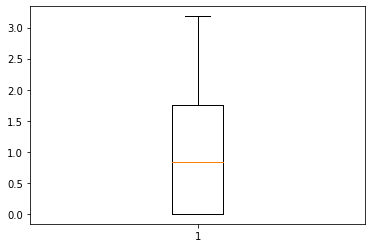

In [264]:
plt.boxplot(df_final_2['42367']);

In [7]:
df_final_2.head(30)

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,...,0.0,148.40,0.0,5.22000,0.0,0.0,2.700000,0.58,16.89,0.0
1,1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,...,0.0,159.86,0.0,5.04000,0.0,0.0,0.000000,1.16,15.15,0.0
2,2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,...,0.0,157.20,0.0,4.92000,0.0,0.0,0.000000,0.92,19.28,0.0
3,3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,...,0.0,104.80,0.0,4.88000,0.0,0.0,5.720000,0.98,17.19,0.0
4,4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,...,0.0,118.17,0.0,13.59000,0.0,0.0,6.050000,1.54,16.80,0.0
5,5,2014-01-06,0.0,0.0,0.0,0.0,5.35,0.0,0.20,0.94,...,0.0,176.44,0.0,10.73000,0.0,0.0,5.810000,1.38,17.48,0.0
6,6,2014-01-07,0.0,0.0,0.0,0.0,4.73,0.0,0.14,0.85,...,0.0,171.94,0.0,4.80000,0.0,0.0,3.070000,0.89,17.86,0.0
7,7,2014-01-08,0.0,0.0,0.0,0.0,3.68,0.0,0.34,1.21,...,0.0,171.19,0.0,6.34000,0.0,0.0,4.040000,0.70,23.99,0.0
8,8,2014-01-09,0.0,0.0,0.0,0.0,3.53,0.0,0.23,1.17,...,0.0,168.89,0.0,7.07000,0.0,0.0,5.680000,1.23,12.34,0.0
9,9,2014-01-10,0.0,0.0,0.0,0.0,3.42,0.0,0.53,0.86,...,0.0,174.02,0.0,0.00000,0.0,0.0,4.390000,0.84,13.84,0.0


In [ ]:
week_1 = df_final_2['5'][7:14]

In [89]:
week_1 = [week_1[0],week_1[1],week_1[2],week_1[3],week_1[4],week_1[5],week_1[6]]

NameError: name 'week_1' is not defined

In [247]:
week_2 = df_final_2['5'][7:14]

In [250]:
week_2

7     3.68
8     3.53
9     3.42
10    3.81
11    4.58
12    3.56
13    4.25
Name: 5, dtype: float64

In [251]:
week_2 = [week_2[7],week_2[8],week_2[9],week_2[10],week_2[11],week_2[12],week_2[13]]

In [235]:
week_3 = df_final_2['5'][14:21]

In [252]:
week_3

14    3.86
15    3.53
16    3.41
17    0.85
18    0.88
19    3.81
20    6.51
Name: 5, dtype: float64

In [253]:
week_3 = [week_3[14],week_3[15],week_3[16],week_3[17],week_3[18],week_3[19],week_3[20]]

In [236]:
week_4 = df_final_2['5'][21:28]

In [256]:
week_4

[9.19, 7.79, 7.02, 7.25, 6.37, 6.43, 7.89]

In [255]:
week_4 = [week_4[21],week_4[22],week_4[23],week_4[24],week_4[25],week_4[26],week_4[27]]

In [257]:
df_try_n = {'Week1':week_1,'Week2':week_2,'Week3':week_3,'Week4':week_4}

In [258]:
df_try_f_n = pd.DataFrame(df_try_n,
columns=['Week1', 'Week2', 'Week3','Week4'])

In [260]:
df_try_f_n.corr()

,Week1,Week2,Week3,Week4
Week1,1.000000,-0.507456,0.344186,-0.348957
Week2,-0.507456,1.000000,-0.150859,-0.211971
Week3,0.344186,-0.150859,1.000000,0.435734
Week4,-0.348957,-0.211971,0.435734,1.000000


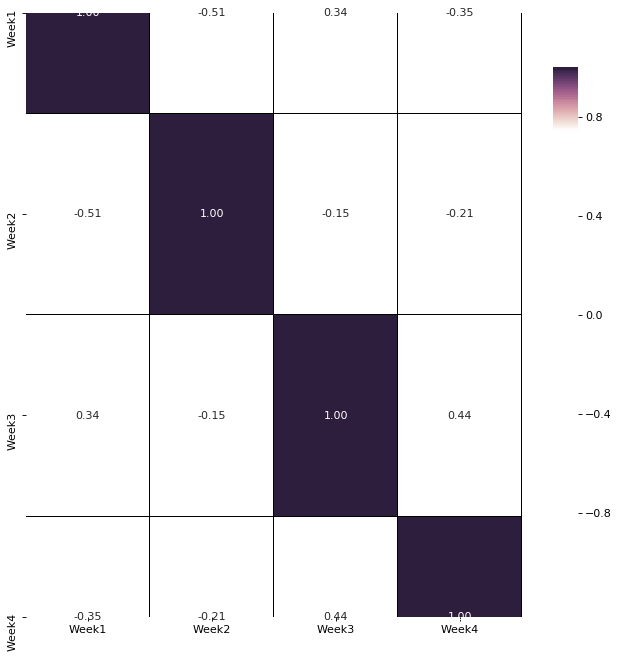

In [261]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f_n.corr(method='pearson'), annot=True, vmin=-1, vmax=1, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='black')
plt.show()

In [315]:
df.iloc[42365].isna().sum()

13

In [301]:
week_1 = df_final_2['42366'][:7]

In [302]:
week_1 = [week_1[0],week_1[1],week_1[2],week_1[3],week_1[4],week_1[5],week_1[6]]

In [303]:
week_2 = df_final_2['42366'][7:14]

In [304]:
week_2 = [week_2[7],week_2[8],week_2[9],week_2[10],week_2[11],week_2[12],week_2[13]]

In [305]:
week_3 = df_final_2['42366'][14:21]

In [306]:
week_3 = [week_3[14],week_3[15],week_3[16],week_3[17],week_3[18],week_3[19],week_3[20]]

In [307]:
week_4 = df_final_2['42366'][21:28]

In [308]:
week_4 = [week_4[21],week_4[22],week_4[23],week_4[24],week_4[25],week_4[26],week_4[27]]

In [309]:
df_try_n_2 = {'Week1':week_1,'Week2':week_2,'Week3':week_3,'Week4':week_4}

In [310]:
df_try_n_2

{'Week1': [5.22, 5.04, 4.92, 4.88, 13.59, 10.73, 4.8],
 'Week2': [6.34,
  7.07,
  0.0,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147],
 'Week3': [13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.44,
  13.610750244877147,
  11.62],
 'Week4': [13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147,
  13.610750244877147]}

In [311]:
df_try_f_n_2 = pd.DataFrame(df_try_n_2,
columns=['Week1', 'Week2', 'Week3','Week4'])

In [312]:
df_try_f_n_2.corr()

,Week1,Week2,Week3,Week4
Week1,1.000000e+00,4.708891e-01,2.055305e-01,-1.900439e-16
Week2,4.708891e-01,1.000000e+00,-3.525841e-01,2.039043e-16
Week3,2.055305e-01,-3.525841e-01,1.000000e+00,3.313911e-15
Week4,-1.900439e-16,2.039043e-16,3.313911e-15,1.000000e+00


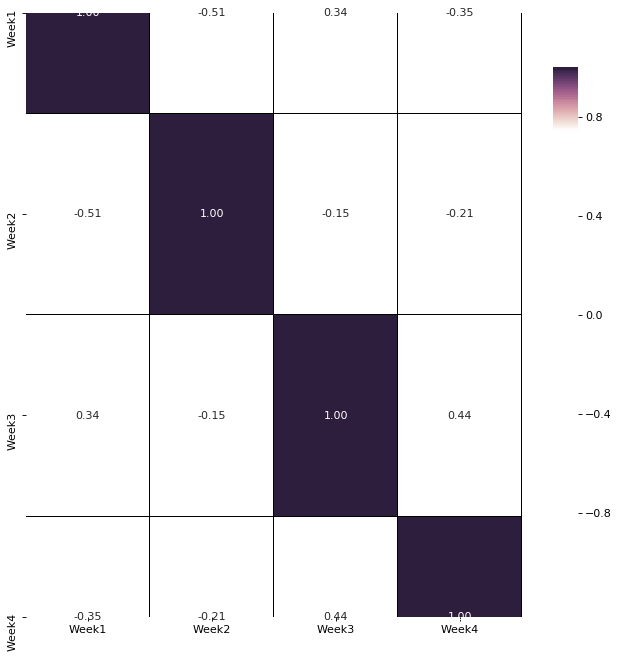

In [313]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f_n.corr(method='pearson'), annot=True, vmin=-1, vmax=1, 
                  fmt='.2f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='black')
plt.show()

In [28]:
df_final_2.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
count,1034.000000,1034.000000,1034.0,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,...,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,516.500000,7.650229,0.0,2.159104,6.288852,7.825693,1.038328,1.442297,2.562209,1.831727,...,8.794819,164.899810,2.929674,6.425892,1.042172,3.214544,4.588565,1.170392,14.904013,2.452050
std,298.634392,8.700374,0.0,4.292646,9.457396,4.499828,1.799215,1.606192,1.921941,3.185618,...,4.741598,65.874820,2.398947,3.119834,0.995888,2.182827,1.839224,1.300801,7.992073,4.126482
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258.250000,0.000000,0.0,0.000000,0.000000,4.650000,0.000000,0.000000,0.850000,0.000000,...,6.090000,130.252500,0.000000,4.312500,0.000000,0.960000,3.852500,0.430000,11.550000,0.000000
50%,516.500000,6.270000,0.0,0.000000,0.000000,6.255000,0.000000,0.900000,2.115000,0.000000,...,8.665000,156.005000,2.920000,5.425000,0.840000,3.750000,4.710000,0.740000,14.850000,0.000000
75%,774.750000,11.642500,0.0,0.000000,11.940000,9.860000,2.202500,2.405000,3.930000,3.527500,...,12.117500,197.342500,4.567500,7.610000,1.750000,4.837500,5.740000,1.257500,19.225000,4.777500
max,1033.000000,27.170558,0.0,13.483126,27.907645,20.115328,6.360282,5.271704,8.343095,9.258373,...,18.341054,309.434097,8.011320,13.610750,3.182948,7.655592,8.404793,5.086875,32.252786,12.165835


In [10]:
df.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [20]:
df.head(10)

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
5,6BCFD78138BC72A9BA1BFB0B79382192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
8,D0A186208CE83FBCCF730857C9A75B6F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.36,3.41,4.73,3.54,4.20,2.77,3.02,4.06,4.75,4.86
9,516954F5FF177CE314656D727FCC66A5,1,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [21]:
df_final_2['10']

0       11.02
1        7.92
2        8.41
3        9.66
4        9.86
        ...  
1029    57.22
1030    56.68
1031    45.28
1032    44.04
1033    43.36
Name: 10, Length: 1034, dtype: float64

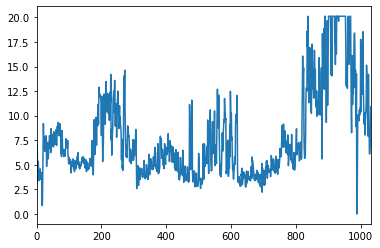

In [18]:
df_final_2['5'].plot()

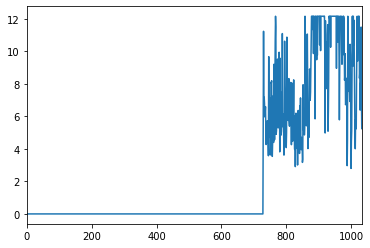

In [27]:
df_final_2['42372'].plot()

In [22]:
df_final_3 = pd.read_csv('CleanSortedDataFrame.csv')

In [23]:
df_final_3.head()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0


In [24]:
df_final_2.head()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0


In [41]:
thives = df['FLAG'].value_counts()[1]/df.shape[0] *100
Normal = df['FLAG'].value_counts()[0]/df.shape[0] *100

In [42]:
print(f'The Presentage of theives is {thives} and the Precentage of Normal users is : {Normal}')

The Presentage of theives is 8.531577456811101 and the Precentage of Normal users is : 91.4684225431889


In [44]:
df_final_2.iloc[0:7]

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0
5,5,2014-01-06,0.0,0.0,0.0,0.0,5.35,0.0,0.20,0.94,...,0.0,176.44,0.0,10.73,0.0,0.0,5.81,1.38,17.48,0.0
6,6,2014-01-07,0.0,0.0,0.0,0.0,4.73,0.0,0.14,0.85,...,0.0,171.94,0.0,4.80,0.0,0.0,3.07,0.89,17.86,0.0


In [49]:
df[df['FLAG'] == 0]

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
3615,1ECF28CAF36C19132B0673378B2B8AA3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.35,3.08,43.25,3.21,34.15,42.54,39.52,31.19,22.41,4.45
3616,B40585F95C419203FF46350D2360B630,0,7.48,9.20,13.71,13.09,11.39,14.12,11.19,14.63,...,15.93,16.89,18.79,21.58,18.99,19.74,24.87,21.30,17.04,20.62
3617,B6E8F3547A23BF3F899ABEF08398EEF5,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3618,590251F1A3B8283C482F26331E3AB694,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.66,10.63,9.86,5.19,6.85,3.65,5.43,3.58,3.72,4.55
3619,B126421AC2054E0F89B2AD699DD95A04,0,0.00,0.00,18.29,12.38,10.48,16.55,0.00,0.00,...,3.63,2.29,35.97,2.48,36.15,21.46,37.44,28.73,22.64,24.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


0        7.48
1       12.84
2       12.02
3       16.50
4       15.89
        ...  
1029    14.21
1030    13.64
1031    10.32
1032    16.32
1033    12.19
Name: 3617, Length: 1034, dtype: float64

In [60]:
the_7 = df_final_2['5'][0:7]

In [61]:
norm_7 = df_final_2['3617'][0:7]

In [65]:
the_7 = [the_7[0],the_7[1],the_7[2],the_7[3],the_7[4],the_7[5],the_7[6]]

In [67]:
norm_7 = [norm_7[0],norm_7[1],norm_7[2],norm_7[3],norm_7[4],norm_7[5],norm_7[6]]

In [76]:
df_try_n_th = {'Day1':[the_7[0]],'Day2':[the_7[1]],'Day3':[the_7[2]],'Day4':[the_7[3]],'Day5':[the_7[4]],'Day6':[the_7[5]],'Day7':[the_7[6]]}

In [73]:
df_try_n_th

{'Day1': 2.9,
 'Day2': 5.64,
 'Day3': 6.99,
 'Day4': 3.32,
 'Day5': 3.61,
 'Day6': 5.35,
 'Day7': 4.73}

In [13]:
df_final_2.head()

,Date,1,2,3,4,5,6,7,8,9,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,0.0,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,0.0,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,0.0,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,0.0,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,0.0,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0


In [35]:
df

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [17]:
df_final_2['42371']

0       16.89
1       15.15
2       19.28
3       17.19
4       16.80
        ...  
1029    11.15
1030    12.22
1031    13.16
1032    13.33
1033    10.39
Name: 42371, Length: 1034, dtype: float64

In [19]:
df_final_2['42370']

0       0.58
1       1.16
2       0.92
3       0.98
4       1.54
        ... 
1029    0.51
1030    0.79
1031    0.66
1032    0.39
1033    0.65
Name: 42370, Length: 1034, dtype: float64

In [20]:
df_final_2['5']

0        2.90
1        5.64
2        6.99
3        3.32
4        3.61
        ...  
1029     6.73
1030     7.52
1031    10.89
1032     9.86
1033     8.72
Name: 5, Length: 1034, dtype: float64

In [48]:
df_final_2['10'][7:14]

7    7.88
Name: 10, dtype: float64

In [29]:
thief_1 = []
for i in range(7):
    thief_1.append(df_final_2['5'][0:7][i])


In [30]:
thief_1

[2.9, 5.64, 6.99, 3.32, 3.61, 5.35, 4.73]

In [32]:
thief_2 = []
for i in range(7):
    thief_2.append(df_final_2['10'][0:7][i])


In [33]:
thief_2

[11.02, 7.92, 8.41, 9.66, 9.86, 8.32, 8.21]

In [36]:
normal_1 = []
for i in range(7):
    normal_1.append(df_final_2['42371'][0:7][i])

In [37]:
normal_1

[16.89, 15.15, 19.28, 17.19, 16.8, 17.48, 17.86]

In [38]:
normal_2 = []
for i in range(7):
    normal_2.append(df_final_2['42370'][0:7][i])


In [39]:
normal_2

[0.58, 1.16, 0.92, 0.98, 1.54, 1.38, 0.89]

In [42]:
normal_2 = np.array(normal_2)
normal_1 = np.array(normal_1)
thief_1 = np.array(thief_1)
thief_2 = np.array(thief_2)

In [43]:
np.corrcoef(normal_2,normal_1)

array([[ 1.        , -0.23278994],
       [-0.23278994,  1.        ]])

In [46]:
np.corrcoef(thief_1,thief_2)

array([[ 1.       , -0.8263391],
       [-0.8263391,  1.       ]])

In [53]:
df_final_2['5'][7]

3.68

In [56]:
Wed_th = [df_final_2['5'][0],df_final_2['5'][7],df_final_2['5'][14],df_final_2['5'][21]]
Th_th  = [df_final_2['5'][1],df_final_2['5'][8],df_final_2['5'][15],df_final_2['5'][22]]
Fri_th = [df_final_2['5'][2],df_final_2['5'][9],df_final_2['5'][16],df_final_2['5'][23]]
Sat_th = [df_final_2['5'][3],df_final_2['5'][10],df_final_2['5'][17],df_final_2['5'][24]]
Sun_th = [df_final_2['5'][4],df_final_2['5'][11],df_final_2['5'][18],df_final_2['5'][25]]
Mon_th = [df_final_2['5'][5],df_final_2['5'][12],df_final_2['5'][19],df_final_2['5'][26]]
Tue_th = [df_final_2['5'][6],df_final_2['5'][13],df_final_2['5'][20],df_final_2['5'][27]]

In [57]:
df_try_n_3 = {'Wed':Wed_th,'Thurs':Th_th,'Fri':Fri_th,'Sat':Sat_th,'Sun':Sun_th,'Mon':Mon_th,"Tues":Tue_th}

In [58]:
df_try_n_3

{'Wed': [2.9, 3.68, 3.86, 9.19],
 'Thurs': [5.64, 3.53, 3.53, 7.79],
 'Fri': [6.99, 3.42, 3.41, 7.02],
 'Sat': [3.32, 3.81, 0.85, 7.25],
 'Sun': [3.61, 4.58, 0.88, 6.37],
 'Mon': [5.35, 3.56, 3.81, 6.43],
 'Tues': [4.73, 4.25, 6.51, 7.89]}

In [59]:
df_try_f_n_3 = pd.DataFrame(df_try_n_3,
columns=['Wed', 'Thurs', 'Fri','Sat','Sun','Mon','Tues'])

In [60]:
df_try_f_n_3

,Wed,Thurs,Fri,Sat,Sun,Mon,Tues
0,2.90,5.64,6.99,3.32,3.61,5.35,4.73
1,3.68,3.53,3.42,3.81,4.58,3.56,4.25
2,3.86,3.53,3.41,0.85,0.88,3.81,6.51
3,9.19,7.79,7.02,7.25,6.37,6.43,7.89


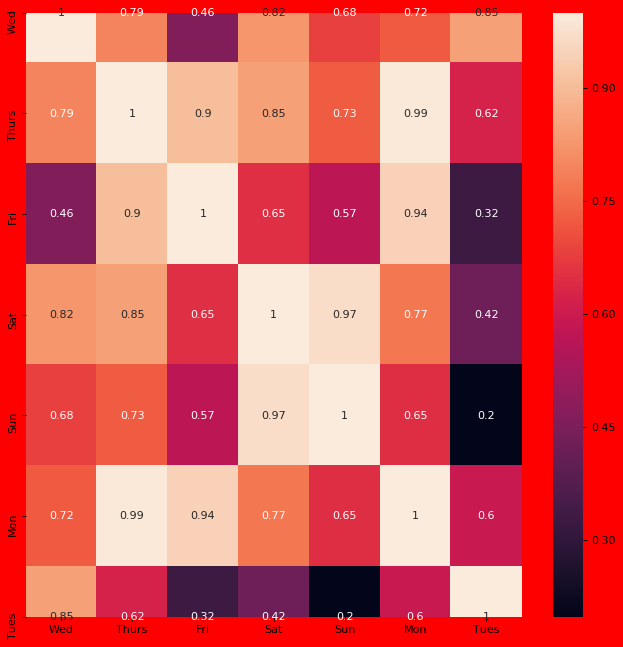

In [121]:
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='r', edgecolor='k')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f_n_3.corr(method='pearson'),annot=True)
plt.show()

In [73]:
Wed_nor = [df_final_2['42371'][0],df_final_2['42371'][7],df_final_2['42371'][14],df_final_2['42371'][21]]
Th_nor  = [df_final_2['42371'][1],df_final_2['42371'][8],df_final_2['42371'][15],df_final_2['42371'][22]]
Fri_nor = [df_final_2['42371'][2],df_final_2['42371'][9],df_final_2['42371'][16],df_final_2['42371'][23]]
Sat_nor = [df_final_2['42371'][3],df_final_2['42371'][10],df_final_2['42371'][17],df_final_2['42371'][24]]
Sun_nor = [df_final_2['42371'][4],df_final_2['42371'][11],df_final_2['42371'][18],df_final_2['42371'][25]]
Mon_nor = [df_final_2['42371'][5],df_final_2['42371'][12],df_final_2['42371'][19],df_final_2['42371'][26]]
Tue_nor = [df_final_2['42371'][6],df_final_2['42371'][13],df_final_2['42371'][20],df_final_2['42371'][27]]

In [74]:
df_try_n_4 = {'Wed':Wed_nor,'Thurs':Th_nor,'Fri':Fri_nor,'Sat':Sat_nor,'Sun':Sun_nor,'Mon':Mon_nor,"Tues":Tue_nor}

In [75]:
df_try_f_n_4 = pd.DataFrame(df_try_n_4,
columns=['Wed', 'Thurs', 'Fri','Sat','Sun','Mon','Tues'])

In [76]:
df_try_f_n_4

,Wed,Thurs,Fri,Sat,Sun,Mon,Tues
0,16.89,15.15,19.28,17.19,16.80,17.48,17.86
1,23.99,12.34,13.84,13.50,14.60,14.46,12.34
2,15.37,17.01,13.46,19.56,12.51,14.85,11.73
3,15.90,13.33,14.84,15.82,16.54,6.69,5.25


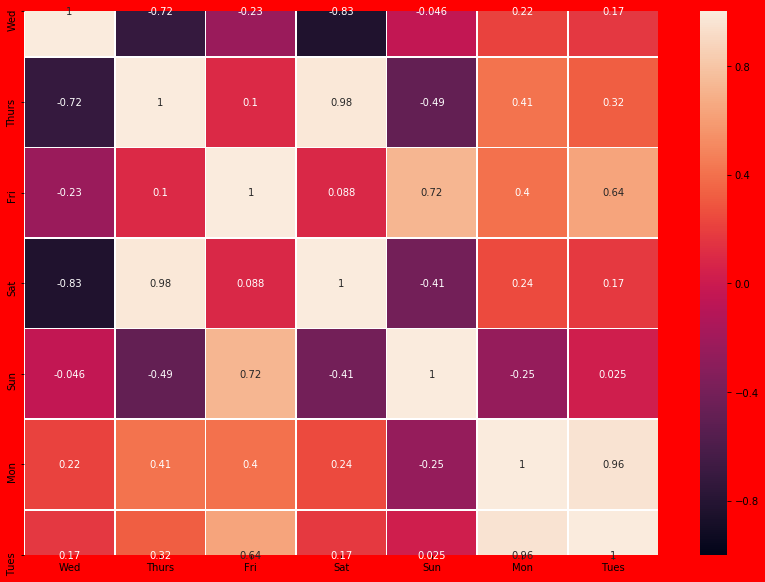

In [126]:
fig = plt.figure(figsize=(15, 10), facecolor='r', edgecolor='r')

cmap = sb.cubehelix_palette(light=7, as_cmap=True)

res = sb.heatmap(df_try_f_n_4.corr(method='pearson'),annot=True,vmax=1,vmin=-1, linewidths=.5,square=True)
# res.savefig("HeatMap_normal.png")
fig = res.get_figure()
fig.savefig('HeatMap_Normal_final.png') 
plt.show()
# plt.savefig('HeatMap_normal.png');


In [80]:
df_try_f_n_4.corr(method='pearson')

,Wed,Thurs,Fri,Sat,Sun,Mon,Tues
Wed,1.000000,-0.716211,-0.227970,-0.829391,-0.045619,0.215877,0.167927
Thurs,-0.716211,1.000000,0.100717,0.982190,-0.486561,0.411884,0.321396
Fri,-0.227970,0.100717,1.000000,0.088478,0.723389,0.404150,0.637791
Sat,-0.829391,0.982190,0.088478,1.000000,-0.410879,0.244051,0.173175
Sun,-0.045619,-0.486561,0.723389,-0.410879,1.000000,-0.252050,0.025320
Mon,0.215877,0.411884,0.404150,0.244051,-0.252050,1.000000,0.960132
Tues,0.167927,0.321396,0.637791,0.173175,0.025320,0.960132,1.000000


In [81]:
df_try_f_n_3.corr(method='pearson')

,Wed,Thurs,Fri,Sat,Sun,Mon,Tues
Wed,1.000000,0.794221,0.460438,0.824872,0.679876,0.721300,0.845701
Thurs,0.794221,1.000000,0.904991,0.846488,0.725494,0.990903,0.621263
Fri,0.460438,0.904991,1.000000,0.651866,0.573452,0.943994,0.324122
Sat,0.824872,0.846488,0.651866,1.000000,0.969985,0.774014,0.423974
Sun,0.679876,0.725494,0.573452,0.969985,1.000000,0.647013,0.198155
Mon,0.721300,0.990903,0.943994,0.774014,0.647013,1.000000,0.595176
Tues,0.845701,0.621263,0.324122,0.423974,0.198155,0.595176,1.000000


In [127]:
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [128]:
df_final_2.describe()

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
count,1034.000000,1034.0,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,...,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,7.650229,0.0,2.159104,6.288852,7.825693,1.038328,1.442297,2.562209,1.831727,36.481197,...,8.794819,164.899810,2.929674,6.425892,1.042172,3.214544,4.588565,1.170392,14.904013,2.452050
std,8.700374,0.0,4.292646,9.457396,4.499828,1.799215,1.606192,1.921941,3.185618,34.633564,...,4.741598,65.874820,2.398947,3.119834,0.995888,2.182827,1.839224,1.300801,7.992073,4.126482
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,4.650000,0.000000,0.000000,0.850000,0.000000,0.000000,...,6.090000,130.252500,0.000000,4.312500,0.000000,0.960000,3.852500,0.430000,11.550000,0.000000
50%,6.270000,0.0,0.000000,0.000000,6.255000,0.000000,0.900000,2.115000,0.000000,35.790000,...,8.665000,156.005000,2.920000,5.425000,0.840000,3.750000,4.710000,0.740000,14.850000,0.000000
75%,11.642500,0.0,0.000000,11.940000,9.860000,2.202500,2.405000,3.930000,3.527500,63.790000,...,12.117500,197.342500,4.567500,7.610000,1.750000,4.837500,5.740000,1.257500,19.225000,4.777500
max,27.170558,0.0,13.483126,27.907645,20.115328,6.360282,5.271704,8.343095,9.258373,110.139346,...,18.341054,309.434097,8.011320,13.610750,3.182948,7.655592,8.404793,5.086875,32.252786,12.165835


# Applying Quantile Transformation in order to normalize the Data :

In [6]:
import sys
import os
import numpy as np
import pandas as pd
# import torch
# from torch.utils.data import Dataset

from sklearn.preprocessing import quantile_transform
from scipy.stats import zscore
from sklearn.model_selection import StratifiedKFold
"""# Processing dataset"""
def get_processed_dataset_final(filepath):
    df_raw = pd.read_csv(filepath)
    df_raw = df_raw.drop('Unnamed: 0',axis = 1)
    df_raw = df_raw.drop('Date',axis=1)
    """## Quantile transform"""

    quantile = quantile_transform(df_raw.values, n_quantiles=10, random_state=0, copy=True, output_distribution='uniform')
    df__ = pd.DataFrame(data=quantile, columns=df_raw.columns, index=df_raw.index)
    return df__

In [11]:
df_quan = get_processed_dataset_final('CleanSortedOutDataFrame.csv')

In [12]:
df_quan.head()

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0.0,0.0,0.0,0.0,0.085294,0.0,0.294118,0.277778,0.0,0.371465,...,0.0,0.414047,0.0,0.452242,0.0,0.0,0.103528,0.370370,0.642049,0.0
1,0.0,0.0,0.0,0.0,0.418554,0.0,0.294118,0.375000,0.0,0.360738,...,0.0,0.523244,0.0,0.413333,0.0,0.0,0.000000,0.707237,0.522939,0.0
2,0.0,0.0,0.0,0.0,0.573669,0.0,0.360179,0.177778,0.0,0.362434,...,0.0,0.498671,0.0,0.386667,0.0,0.0,0.000000,0.600753,0.749487,0.0
3,0.0,0.0,0.0,0.0,0.097647,0.0,0.366890,0.413889,0.0,0.366759,...,0.0,0.121593,0.0,0.377778,0.0,0.0,0.741620,0.634652,0.662009,0.0
4,0.0,0.0,0.0,0.0,0.106176,0.0,0.346756,0.170370,0.0,0.367451,...,0.0,0.194166,0.0,0.998708,0.0,0.0,0.804382,0.792416,0.636061,0.0


In [167]:
date = df_final_2['Date'].values

In [168]:
date

array(['2014-01-01', '2014-01-02', '2014-01-03', ..., '2016-10-29',
       '2016-10-30', '2016-10-31'], dtype=object)

In [170]:
df_quan.insert(loc = 0, column = 'Date', value = date)

In [29]:
df['FLAG'].value_counts()

0    38757
1     3615
Name: FLAG, dtype: int64

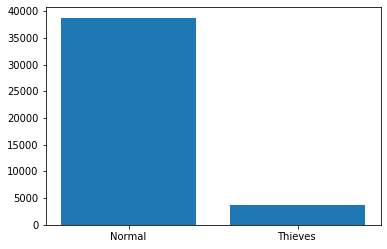

In [32]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
langs = ['Normal', 'Thieves ']
students = [38757,3615]
plt.bar(langs,students)
plt.show()


In [34]:
df_quan.head(10)

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0.0,0.0,0.0,0.0,0.085294,0.0,0.294118,0.277778,0.0,0.371465,...,0.0,0.414047,0.0,0.452242,0.0,0.0,0.103528,0.370370,0.642049,0.0
1,0.0,0.0,0.0,0.0,0.418554,0.0,0.294118,0.375000,0.0,0.360738,...,0.0,0.523244,0.0,0.413333,0.0,0.0,0.000000,0.707237,0.522939,0.0
2,0.0,0.0,0.0,0.0,0.573669,0.0,0.360179,0.177778,0.0,0.362434,...,0.0,0.498671,0.0,0.386667,0.0,0.0,0.000000,0.600753,0.749487,0.0
3,0.0,0.0,0.0,0.0,0.097647,0.0,0.366890,0.413889,0.0,0.366759,...,0.0,0.121593,0.0,0.377778,0.0,0.0,0.741620,0.634652,0.662009,0.0
4,0.0,0.0,0.0,0.0,0.106176,0.0,0.346756,0.170370,0.0,0.367451,...,0.0,0.194166,0.0,0.913187,0.0,0.0,0.804382,0.792416,0.636061,0.0
5,0.0,0.0,0.0,0.0,0.371629,0.0,0.343400,0.294444,0.0,0.362122,...,0.0,0.648900,0.0,0.856757,0.0,0.0,0.761959,0.778269,0.675687,0.0
6,0.0,0.0,0.0,0.0,0.262738,0.0,0.313725,0.244444,0.0,0.361742,...,0.0,0.616792,0.0,0.360000,0.0,0.0,0.134384,0.583804,0.691267,0.0
7,0.0,0.0,0.0,0.0,0.108235,0.0,0.390380,0.388889,0.0,0.360600,...,0.0,0.611440,0.0,0.648323,0.0,0.0,0.308244,0.469136,0.877209,0.0
8,0.0,0.0,0.0,0.0,0.103824,0.0,0.353468,0.377778,0.0,0.368524,...,0.0,0.595029,0.0,0.709859,0.0,0.0,0.732580,0.730263,0.309619,0.0
9,0.0,0.0,0.0,0.0,0.100588,0.0,0.449104,0.250000,0.0,0.361845,...,0.0,0.631633,0.0,0.000000,0.0,0.0,0.411111,0.555556,0.424436,0.0


In [275]:
df_m = pd.read_csv('CleanSortedOutDataFrame.csv')

In [276]:
df_m.head(10)

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0,2014-01-01,0.0,0.0,0.0,0.0,2.90,0.0,0.11,0.91,...,0.0,148.40,0.0,5.22,0.0,0.0,2.70,0.58,16.89,0.0
1,1,2014-01-02,0.0,0.0,0.0,0.0,5.64,0.0,0.11,1.16,...,0.0,159.86,0.0,5.04,0.0,0.0,0.00,1.16,15.15,0.0
2,2,2014-01-03,0.0,0.0,0.0,0.0,6.99,0.0,0.25,0.75,...,0.0,157.20,0.0,4.92,0.0,0.0,0.00,0.92,19.28,0.0
3,3,2014-01-04,0.0,0.0,0.0,0.0,3.32,0.0,0.27,1.30,...,0.0,104.80,0.0,4.88,0.0,0.0,5.72,0.98,17.19,0.0
4,4,2014-01-05,0.0,0.0,0.0,0.0,3.61,0.0,0.21,0.74,...,0.0,118.17,0.0,13.59,0.0,0.0,6.05,1.54,16.80,0.0
5,5,2014-01-06,0.0,0.0,0.0,0.0,5.35,0.0,0.20,0.94,...,0.0,176.44,0.0,10.73,0.0,0.0,5.81,1.38,17.48,0.0
6,6,2014-01-07,0.0,0.0,0.0,0.0,4.73,0.0,0.14,0.85,...,0.0,171.94,0.0,4.80,0.0,0.0,3.07,0.89,17.86,0.0
7,7,2014-01-08,0.0,0.0,0.0,0.0,3.68,0.0,0.34,1.21,...,0.0,171.19,0.0,6.34,0.0,0.0,4.04,0.70,23.99,0.0
8,8,2014-01-09,0.0,0.0,0.0,0.0,3.53,0.0,0.23,1.17,...,0.0,168.89,0.0,7.07,0.0,0.0,5.68,1.23,12.34,0.0
9,9,2014-01-10,0.0,0.0,0.0,0.0,3.42,0.0,0.53,0.86,...,0.0,174.02,0.0,0.00,0.0,0.0,4.39,0.84,13.84,0.0


# Data Augmentation Section:

In [13]:
df_quan.head()

,1,2,3,4,5,6,7,8,9,10,...,42363,42364,42365,42366,42367,42368,42369,42370,42371,42372
0,0.0,0.0,0.0,0.0,0.085294,0.0,0.294118,0.277778,0.0,0.371465,...,0.0,0.414047,0.0,0.452242,0.0,0.0,0.103528,0.370370,0.642049,0.0
1,0.0,0.0,0.0,0.0,0.418554,0.0,0.294118,0.375000,0.0,0.360738,...,0.0,0.523244,0.0,0.413333,0.0,0.0,0.000000,0.707237,0.522939,0.0
2,0.0,0.0,0.0,0.0,0.573669,0.0,0.360179,0.177778,0.0,0.362434,...,0.0,0.498671,0.0,0.386667,0.0,0.0,0.000000,0.600753,0.749487,0.0
3,0.0,0.0,0.0,0.0,0.097647,0.0,0.366890,0.413889,0.0,0.366759,...,0.0,0.121593,0.0,0.377778,0.0,0.0,0.741620,0.634652,0.662009,0.0
4,0.0,0.0,0.0,0.0,0.106176,0.0,0.346756,0.170370,0.0,0.367451,...,0.0,0.194166,0.0,0.998708,0.0,0.0,0.804382,0.792416,0.636061,0.0


In [14]:
df_fina = df_quan.T

In [18]:
df.columns[2:]

Index(['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13',
       '2014/1/14', '2014/1/15', '2014/1/16', '2014/1/17', '2014/1/18',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1034)

In [19]:
new_header = df.columns[2:]

In [279]:
# df_fina = df_fina.drop(index = 'Unnamed: 0')
# df_fina = df_fina.drop(index='Date')
#  #take the data less the header row

In [129]:
# df_fina.columns = new_header

In [280]:
new_header

0       2014-01-01
1       2014-01-02
2       2014-01-03
3       2014-01-04
4       2014-01-05
           ...    
1029    2016-10-27
1030    2016-10-28
1031    2016-10-29
1032    2016-10-30
1033    2016-10-31
Name: Date, Length: 1034, dtype: object

In [20]:
index = []
for i in range(1034):
    index.append(new_header[i])

In [21]:
len(index)

1034

In [22]:
df_fina.columns = index

In [23]:
df_fina

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.572016,0.633059,0.634431,0.691143,0.474264,0.671461,0.685339,0.596708,0.681807,0.544420
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.935028,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.773610,0.798603,0.821400,0.796366,0.846220,0.859003,0.828750,0.842705,0.791573,0.760815
5,0.085294,0.418554,0.573669,0.097647,0.106176,0.371629,0.262738,0.108235,0.103824,0.100588,...,0.892097,0.770109,0.683217,0.480077,0.478927,0.551341,0.616653,0.793429,0.752234,0.695631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.415638,0.392318,0.344307,0.379973,0.377229,0.355281,0.326995,0.433471,0.466712,0.326995
42369,0.103528,0.000000,0.000000,0.741620,0.804382,0.761959,0.134384,0.308244,0.732580,0.411111,...,0.254480,0.890726,0.141141,0.608787,0.208709,0.479012,0.220871,0.830986,0.804382,0.511111
42370,0.370370,0.707237,0.600753,0.634652,0.792416,0.778269,0.583804,0.469136,0.730263,0.555556,...,0.640301,0.398148,0.435185,0.342593,0.297362,0.311751,0.524691,0.444444,0.225420,0.435185
42371,0.642049,0.522939,0.749487,0.662009,0.636061,0.675687,0.691267,0.877209,0.309619,0.424436,...,0.558882,0.614770,0.360691,0.215817,0.287012,0.230496,0.301640,0.370252,0.383798,0.215817


In [285]:
df['FLAG'][0]

1

In [286]:
flag = []
for i in range(42372):
    flag.append(df['FLAG'][i])

In [287]:
df_fina.insert(0, 'FLAG', flag)

In [288]:
df_fina['FLAG'].value_counts()

0    38757
1     3615
Name: FLAG, dtype: int64

In [289]:
df_fina.isnull().sum()

FLAG          0
2014-01-01    0
2014-01-02    0
2014-01-03    0
2014-01-04    0
             ..
2016-10-27    0
2016-10-28    0
2016-10-29    0
2016-10-30    0
2016-10-31    0
Length: 1035, dtype: int64

In [290]:
df_min = df_fina[df_fina['FLAG'] == 1].reset_index(drop = True)

In [291]:
df_min.shape

(3615, 1035)

In [177]:
minor = df_min.drop('FLAG', axis = 1).to_numpy()

In [179]:
# import math

# math.sqrt(len(minor))

60.124870062229654

In [180]:
k = 60
from sklearn.neighbors import NearestNeighbors

In [181]:
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(minor)


In [182]:
distances, indices = nbrs.kneighbors(minor)


In [185]:
indices = indices[:, 1:]

In [186]:
indices.shape

(3615, 60)

In [187]:
def SNN(i, j):
    return len(np.intersect1d(indices[i], indices[j]))

In [188]:
snn_sim = {}


In [189]:
from tqdm import tqdm

In [190]:
for i in tqdm(range(len(indices))):
    snn_sim[i] = {}
    for j in range(len(indices)):
        snn_sim[i][j] = SNN(i, j)

100%|██████████| 3615/3615 [04:24<00:00, 13.68it/s]


In [2]:
df_t_m = pd.read_csv('outliersRemoved.csv')

In [239]:
df_t_m.iloc[4].values[2:].std()

5.9399877675263895

In [240]:
df_fina.iloc[4].values[1:].std()

5.9399877675263895

In [3]:
df_tr = pd.read_csv('CleanSortedOutDataFrame.csv')
df_tr2 = pd.read_csv('CleanDataFrame.csv')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


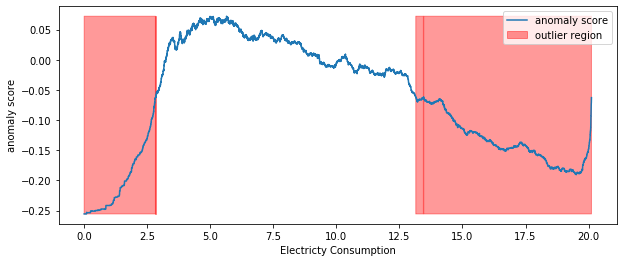

In [297]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_fina.iloc[4].values[1:].reshape(-1, 1))
xx = np.linspace(df_fina.iloc[4].min(), df_fina.iloc[4].max(), len(df_fina)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Electricty Consumption')
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


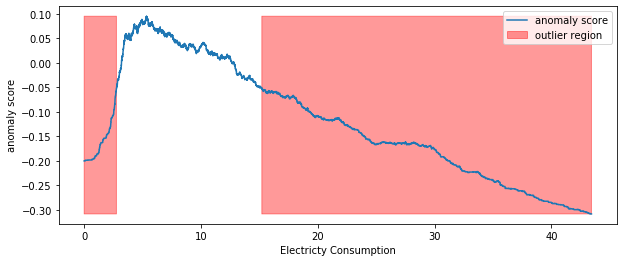

In [301]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_tr2.iloc[4][3:].values[1:].reshape(-1, 1))
xx = np.linspace(df_tr2.iloc[4][3:].min(),df_tr2.iloc[4][3:].max(), len(df_tr2)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Electricty Consumption')
plt.show();

## Scaling the data using minimum/maximum scaling 


In [59]:
df_fina = df_tr.T

In [60]:
new_header = df_fina.iloc[1]

In [61]:
df_fina = df_fina.drop(index = 'Unnamed: 0')
df_fina = df_fina.drop(index='Date')
 #take the data less the header row

In [62]:
new_header

0       2014-01-01
1       2014-01-02
2       2014-01-03
3       2014-01-04
4       2014-01-05
           ...    
1029    2016-10-27
1030    2016-10-28
1031    2016-10-29
1032    2016-10-30
1033    2016-10-31
Name: Date, Length: 1034, dtype: object

In [63]:
index = []
for i in range(1034):
    index.append(new_header[i])

In [64]:
df_fina.columns = index

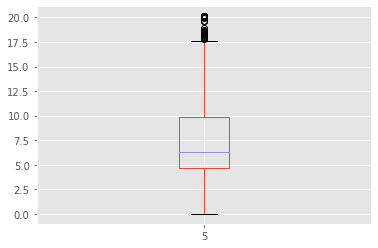

In [65]:
df_fina.iloc[4].plot(kind='box')

In [42]:
kWhs = df_fina.iloc[:, :]
#seperate the features and the label

In [44]:
NUM_CONSUMERS, NUM_DAYS = kWhs.shape

print(NUM_CONSUMERS, NUM_DAYS)

42372 1034


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [48]:
def scale_features(X=kWhs, scaling_strategy='Standard', plot_distributions=False):
  """Allows user to scale features for individual samples using specified scaling strategy.
  `Standard` - all features scaled to have mean 0, standard deviation of 1
  `MinMax` - all features scaled according to x - x_min / (x_max - x_min)
  `MaxAbs` - all features scaled according to x / abs(x_max)
  
  Returns matrix of scaled features as a numpy array.

  Also allows before/after plots of feature values to compare effect of scaling
  """
  # StandardScaler - all features will have mean of 0, and std deviation of 1
  if (scaling_strategy=='Standard'):
    # Instantiate a StandardScaler object
    scaler = StandardScaler()
  elif (scaling_strategy=='MinMax'):
    scaler = MinMaxScaler()
  elif (scaling_strategy=='MaxAbs'):
    scaler = MaxAbsScaler()

  # Make a copy of the features, transpose so that consumers become columns
  X_copy = X.copy().transpose()

  # Once consumers are in columns, scale each consumer using scaler object and retranspose results 
  # Retransposing ensures that in scaled data, the consumers are still rows
  X_scaled = scaler.fit_transform(X_copy).transpose() # THIS IS A NUMPY ARRAY, NOT A DATAFRAME

  # If the user has asked to compare distributions
  if plot_distributions:
    # First figure - before scaling
    plt.figure(figsize=(12, 6))
    distplot(X.values.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Unscaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - Before Scaling', fontsize=18)

    # Second figure - after scaling
    plt.figure(figsize=(12, 6))
    distplot(X_scaled.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Scaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - After {} Scaling'.format(scaling_strategy), fontsize=18)

  # Return the scaled features
  return X_scaled

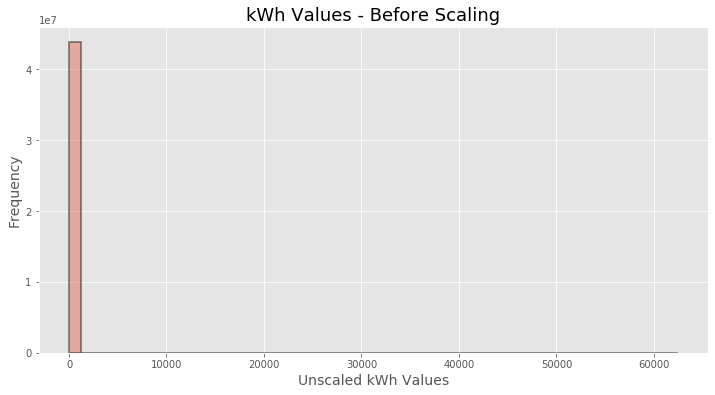

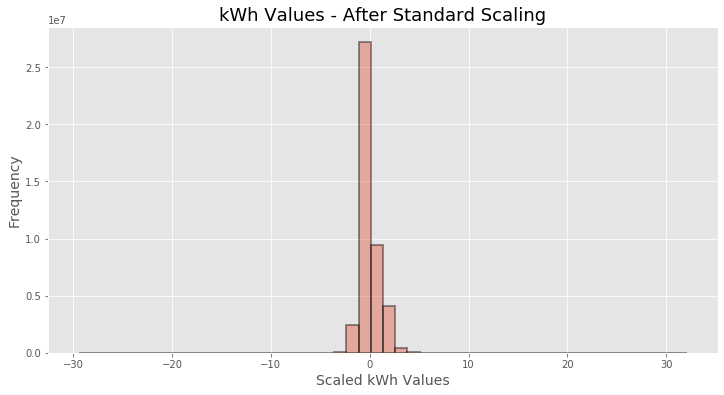

In [52]:
X_scaled_std = scale_features(X=kWhs,scaling_strategy='Standard', plot_distributions=True)

In [67]:
df_fina.shape

(42372, 1034)

In [24]:
from sklearn.model_selection import train_test_split

X = df_fina
y = df["FLAG"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 8.4
% Positive class in Test  = 8.94


# Model Without SMOTE

Accuracy = 0.91
Recall = 0.04



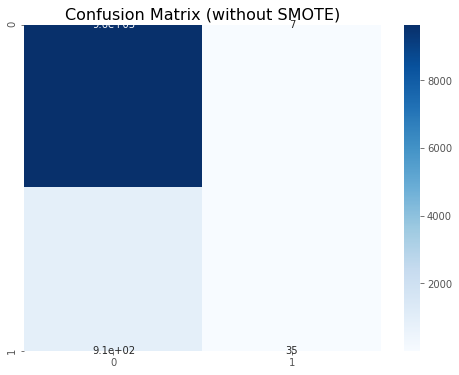

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sn.heatmap(cm, annot=True, cmap='Blues');

# Using SMOTE Algorithm to generate data 

In [72]:
pip install imbalanced-learn


     |████████████████████████████████| 206 kB 294 kB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 1.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negativ')

Shape of X before SMOTE: (42372, 1034)
Shape of X after SMOTE: (77514, 1034)

Balance of positive and negativ


## Visualizing the ratio between thieves and normal users after doing SMOTE algorithm :

In [40]:
thieves = y_sm.value_counts()[0]
normal = y_sm.value_counts()[1]

In [41]:
thieves - normal

0

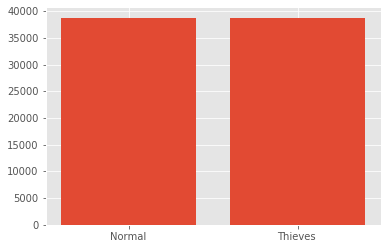

In [42]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
langs = ['Normal', 'Thieves ']
students = [normal,thieves]
plt.bar(langs,students)
plt.show()


Accuracy = 0.96
Recall = 0.95



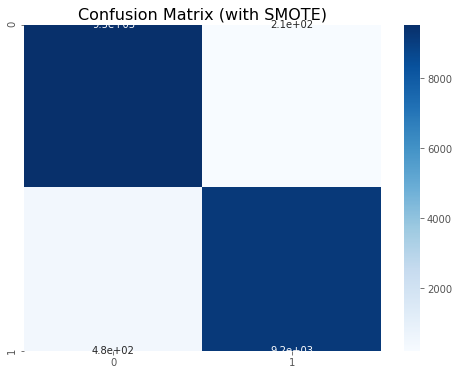

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sn.heatmap(cm, annot=True, cmap='Blues');

In [45]:
X_test

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
42066,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.722801,0.676002,0.729503,1.000000,1.000000,1.000000
5548,0.369222,0.000000,0.000000,0.418162,0.000000,0.000000,0.000000,0.423056,0.411637,0.398586,...,0.828283,0.777778,0.743687,0.828283,0.926963,0.896028,0.903167,0.808081,0.732323,0.627628
16136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.415567,0.460622,0.540501,0.386689,0.433718,0.572851,0.333284,0.489945,0.429593,0.327619
10034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.878000,0.878000,0.878000
34212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.958516,0.900651,0.836986,0.846057,0.932176,0.873147,0.924491,0.868362,0.871191,0.866170
60638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.842309,0.834451,0.980089,0.973515,0.833524,0.995709,0.980360,0.831730,0.830213,0.974819
12998,1.000000,0.983150,0.000000,0.733421,0.901214,0.000000,0.856381,0.687609,0.906677,0.000000,...,0.000000,0.000000,0.000000,0.365079,0.465278,0.349206,0.000000,0.673211,0.000000,0.000000
49712,0.556100,0.414744,0.477875,0.539922,0.431588,0.445644,0.491766,0.401322,0.369077,0.457638,...,0.862790,0.913719,0.958262,0.940077,0.826164,0.869431,0.841583,0.957168,0.904179,0.669026


In [49]:
df_fina

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.572016,0.633059,0.634431,0.691143,0.474264,0.671461,0.685339,0.596708,0.681807,0.544420
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.935028,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.773610,0.798603,0.821400,0.796366,0.846220,0.859003,0.828750,0.842705,0.791573,0.760815
5,0.085294,0.418554,0.573669,0.097647,0.106176,0.371629,0.262738,0.108235,0.103824,0.100588,...,0.892097,0.770109,0.683217,0.480077,0.478927,0.551341,0.616653,0.793429,0.752234,0.695631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.415638,0.392318,0.344307,0.379973,0.377229,0.355281,0.326995,0.433471,0.466712,0.326995
42369,0.103528,0.000000,0.000000,0.741620,0.804382,0.761959,0.134384,0.308244,0.732580,0.411111,...,0.254480,0.890726,0.141141,0.608787,0.208709,0.479012,0.220871,0.830986,0.804382,0.511111
42370,0.370370,0.707237,0.600753,0.634652,0.792416,0.778269,0.583804,0.469136,0.730263,0.555556,...,0.640301,0.398148,0.435185,0.342593,0.297362,0.311751,0.524691,0.444444,0.225420,0.435185
42371,0.642049,0.522939,0.749487,0.662009,0.636061,0.675687,0.691267,0.877209,0.309619,0.424436,...,0.558882,0.614770,0.360691,0.215817,0.287012,0.230496,0.301640,0.370252,0.383798,0.215817
